In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull==True

False

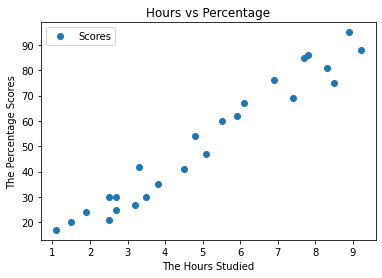

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
data.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Scores')    
plt.show()  
print(data.corr())

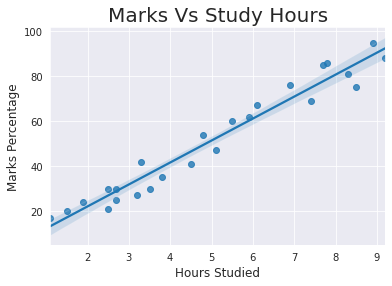

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.set_style('darkgrid')
sns.regplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [7]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)


In [8]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("****Model Trained****")

****Model Trained****


In [10]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [11]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually comparing the predicted marks with actual marks ###

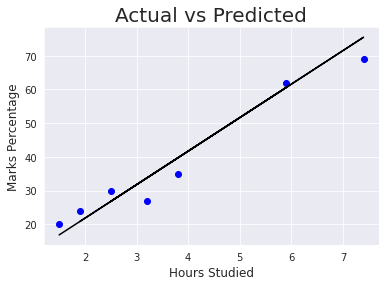

In [14]:
plt.scatter(x=val_x, y=val_y, color='blue')
plt.plot(val_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Model Evaluation ###

In [15]:
print('mean absolute error:',mean_absolute_error(val_y,pred_y))

mean absolute error: 4.130879918502486


Small mean absolute error depicts that the chance of error is less

### What will be predicted score if a student studies for 9.25 hrs/ day? ###

In [16]:
hours=[9.25]
solution = regression.predict([hours])
print("score = {}".format(round(solution[0],3)))

score = 93.893


According to regression model if a student studies for 9.25 hrs ,he/she is likely to score 93.89 marks.